In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Valores de referencia para el problema
phi0 = 10
phiL = 2
L = 10
u = 0.2
rho = 5
Tau = 20

In [3]:
# Imprimiendo el valor del número de Peclet
Pe = rho * u * L / Tau
print(f'Valor del número de Péclet: {Pe:.4f}')

Valor del número de Péclet: 0.5000


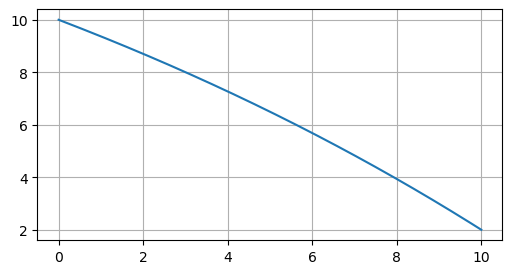

In [4]:
# Vector del espacio
x = np.linspace(0, L, 200)

# Función para calcular phi en el dominio
def phi_x(x, phi0, phiL, Pe, L):

    return phi0 + (phiL - phi0) * ((np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1))

# Calculando phi
phi = phi_x(x, phi0, phiL, Pe, L)

fig = plt.figure(figsize=(6, 3))

plt.plot(x, phi)
plt.grid()

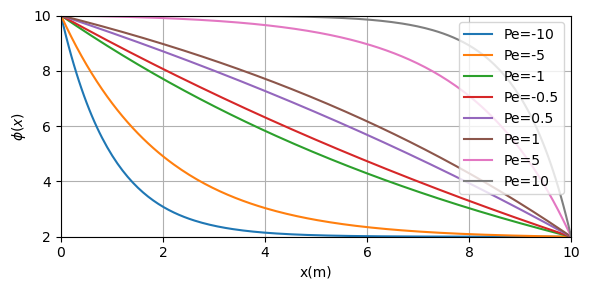

In [5]:
# Haciendo un ejercicio con varios Peclet
Pe = [-10, -5, -1, -0.5, 0.5, 1, 5, 10]

fig = plt.figure(figsize=(6, 3))

for Pec in Pe:

    phi = phi_x(x, phi0, phiL, Pec, L)
    plt.plot(x, phi, label=f'Pe={Pec}')

plt.legend()
plt.xlabel('x(m)')
plt.ylabel(r'$\phi(x)$')
plt.xlim(0, L)
plt.ylim(min([phi0, phiL]), max([phi0, phiL]))
plt.grid()
plt.tight_layout()

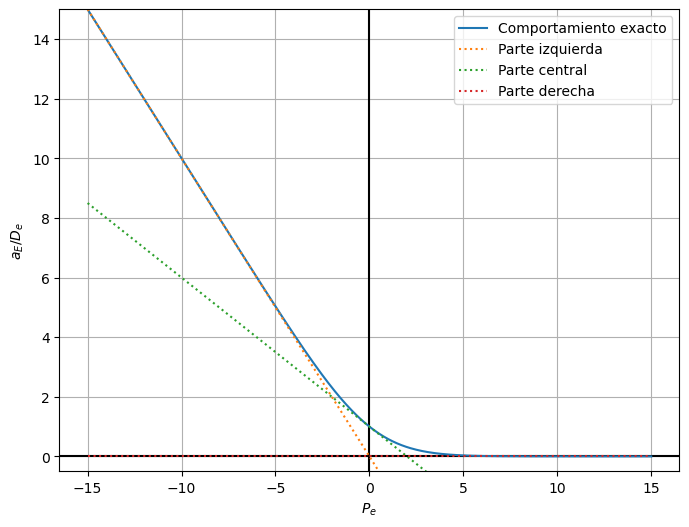

In [23]:
# Probando el esquema híbrido
Pe = np.linspace(-15, 15, 500)
aE_De = Pe / (np.exp(Pe) - 1)

# Partiendo los comportamientos
P1 = -Pe
P2 = 1 - Pe / 2
P3 = np.zeros_like(Pe)

fig = plt.figure(figsize=(8, 6))

plt.axhline(y = 0, color='black')
plt.axvline(x=0, color='black')
plt.plot(Pe, aE_De, label='Comportamiento exacto')
plt.plot(Pe, P1, ls=':', label='Parte izquierda')
plt.plot(Pe, P2, ls=':', label='Parte central')
plt.plot(Pe, P3, ls=':', label='Parte derecha')
plt.xlabel(r'$P_e$')
plt.ylabel(r'$a_E/D_e$')
plt.ylim((-0.5, 15))
plt.grid()
plt.legend()


(-0.5, 20.0)

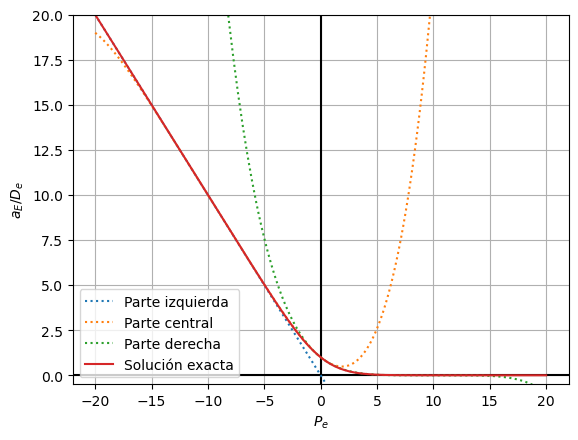

In [32]:
# Esquema en series de potencias
Pe = np.linspace(-20, 20, 200)
aE_De = Pe / (np.exp(Pe) - 1)

P1 = -Pe
P2 = (1 + 0.1 * Pe) ** 5 - Pe
P3 = (1 - 0.1 * Pe) ** 5


fig = plt.figure()
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.plot(Pe, P1, ls=':', label='Parte izquierda')
plt.plot(Pe, P2, ls=':', label='Parte central')
plt.plot(Pe, P3, ls=':', label='Parte derecha')
plt.plot(Pe, aE_De, label='Solución exacta')
plt.xlabel(r'$P_e$')
plt.ylabel(r'$a_E/D_e$')
plt.grid()
plt.legend()
plt.ylim((-0.5, 20))